<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import drive

drive.mount('/content/drive')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Social_Network_Ads.csv')

In [ ]:
df.applyhead()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(df.shape)

(10000, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first = True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
Y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
#in first layer we introduced 3 nodes
model.add(Dense(11, activation='relu', input_dim =11))
#input_dim =11 because we have 11 input columns
model.add(Dense(11, activation='relu'))
#in second layer we introduced 1 node
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, epochs=100, validation_split=0.2)
# now training data in going to run on 8000-2000=6000 and simultaneously test the accuracy of model on remaining 2000 validation data and let us know the accuracy of our model

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.8734 - val_loss: 0.3463 - val_accuracy: 0.8575
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8717 - val_loss: 0.3467 - val_accuracy: 0.8550
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8719 - val_loss: 0.3482 - val_accuracy: 0.8550
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8719 - val_loss: 0.3458 - val_accuracy: 0.8575
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8716 - val_loss: 0.3489 - val_accuracy: 0.8544
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8712 - val_loss: 0.3461 - val_accuracy: 0.8562
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8717 - val_loss: 0.3499 - val_accuracy: 0.8531

In [ ]:
model.layers[0].get_weights()

[array([[ 0.30266088,  0.31776842, -0.08116329,  0.10427119, -0.8970055 ,
         -0.21476074, -0.13595036,  0.42367914,  0.33060423, -0.07025283,
          0.09615203],
        [ 0.27203894, -0.083164  ,  0.27504447, -0.06862257, -0.2889142 ,
         -0.6869474 ,  1.8839134 ,  0.10515893,  0.2591121 , -0.10695429,
         -0.4343097 ],
        [ 0.15806104, -0.7225274 , -0.06874625, -0.9699512 , -0.7167145 ,
         -0.08454734, -0.07862331,  0.42026377, -0.11149834,  0.3249836 ,
         -0.28514138],
        [-0.40887338,  0.11979003, -0.18682262, -0.25681233,  0.40175372,
         -0.07243971, -0.2046044 ,  0.5611011 , -0.44375956, -0.7756605 ,
          0.07363192],
        [-0.8862544 , -0.9077161 ,  1.3328484 , -0.3960554 , -0.60769343,
         -1.0250233 , -0.6027783 , -0.78583294, -0.3132767 ,  0.00665621,
         -0.08287935],
        [-0.29743844,  0.82754534, -0.30021194,  0.9966204 , -0.6618061 ,
          0.02705223,  0.03148019, -0.0704797 , -0.67744297,  0.1788124

In [ ]:
model.layers[1].get_weights()

[array([[-0.4273924 , -0.6322343 ,  0.6189236 ,  0.48448074,  0.63057655,
          0.6096698 , -0.15740691,  0.254141  ,  0.22863135,  0.65276915,
         -0.29414138],
        [-0.9171211 ,  0.36020133,  0.11748034,  0.4245604 ,  0.08830062,
         -0.07944879,  0.4895297 ,  0.54813755,  0.68510175,  0.5788242 ,
         -0.57196736],
        [ 0.81478333, -0.3555116 ,  0.57893306,  0.24184279,  0.4896851 ,
         -1.5614399 ,  0.4536282 ,  0.6654268 ,  0.04471403, -0.38304788,
         -0.40656337],
        [ 0.5246559 , -0.8930784 , -0.09098208,  0.57889545,  0.4790831 ,
          0.10672991, -0.07739327, -0.386622  ,  0.08466928,  0.31116432,
          0.84289175],
        [-0.27854213, -0.33849066, -1.6844699 , -0.03573248, -0.4622683 ,
          0.22726952,  0.8413187 ,  0.2409548 , -0.0451356 , -0.22056518,
         -0.3203503 ],
        [-0.75725377,  0.16356577, -0.6506791 ,  0.36524412, -0.15292045,
         -0.10127166, -0.29725298,  0.28681716,  0.14764614,  0.4520380

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log > 0.5,1,0)
# it means if y_log >0.5 then y_log=1 otherwise it would be zero.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8625

In [ ]:
import matplotlib.pyplot as plt

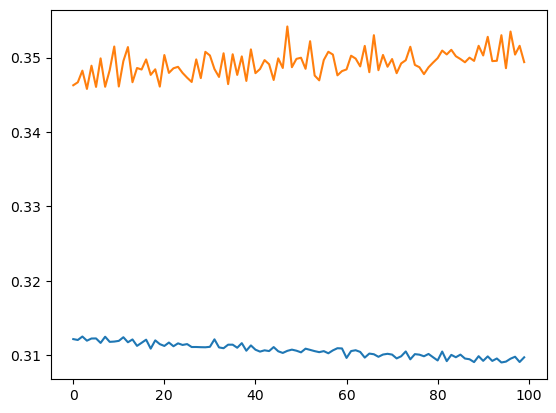

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

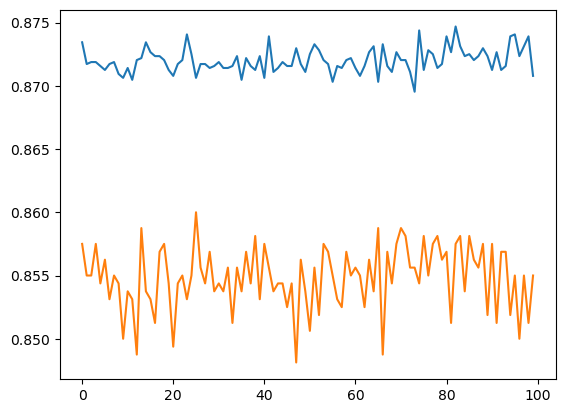

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])